## Load modules

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn as sk

## Load data

In [14]:
# Create datasets for grouped data operations
df = pd.read_csv('./output/masterfile.csv')
cy_df = df

mask = df['DUMMY_CIVIL'] == 1
cw_df = df[mask]


cw_grouped = cw_df.groupby('year').agg(
    {
        'US_milex': 'first', 
        'SU_milex': 'first',
        'UK_milex': 'first',
        'FR_milex': 'first',
        'COL_milex': 'first',
        'Soviet Union': 'sum',
        'United States': 'sum',
        'France': 'sum', 
        'United Kingdom': 'sum',
        'COL_IMI': 'sum',
        'US_cinc': 'first',
        'SU_cinc': 'first',
        'UK_cinc': 'first',
        'FR_cinc': 'first',
        'COL_cinc': 'first',
        'ponatind': 'sum',
        'onatind': 'sum',
        'pointrap': 'sum',
        'ointrap': 'sum',
        'pointer': 'sum',
        'ointer': 'sum',
        'pocivil': 'sum',
        'ocivil': 'sum',
        'pononind': 'sum',
        'n_civilwars': 'first',
        'US_ci': 'sum',
        'SU_ci': 'sum',
        'COL_ci': 'sum',
        'FR_ci': 'sum',
        'UK_ci': 'sum',
        'summed_COL_ci': 'first',
        'summed_US_ci': 'first',
        'summed_UK_ci': 'first',
        'summed_SU_ci': 'first',
        'summed_FR_ci': 'first',
        'DUMMY_CIVIL': 'sum',
        'NATIND': 'sum',
        'war_duration': 'mean'
    }
).reset_index()


cy_grouped = df.groupby('year').agg(
    {
        'US_milex': 'first', 
        'SU_milex': 'first',
        'UK_milex': 'first',
        'FR_milex': 'first',
        'COL_milex': 'first',
        'Soviet Union': 'sum',
        'United States': 'sum',
        'France': 'sum', 
        'United Kingdom': 'sum',
        'COL_IMI': 'sum',
        'US_cinc': 'first',
        'SU_cinc': 'first',
        'UK_cinc': 'first',
        'FR_cinc': 'first',
        'COL_cinc': 'first',
        'ponatind': 'sum',
        'onatind': 'sum',
        'pointrap': 'sum',
        'ointrap': 'sum',
        'pointer': 'sum',
        'ointer': 'sum',
        'pocivil': 'sum',
        'ocivil': 'sum',
        'pononind': 'sum',
        'n_civilwars': 'first',
        'US_ci': 'sum',
        'SU_ci': 'sum',
        'COL_ci': 'sum',
        'FR_ci': 'sum',
        'UK_ci': 'sum',
        'summed_COL_ci': 'first',
        'summed_US_ci': 'first',
        'summed_UK_ci': 'first',
        'summed_SU_ci': 'first',
        'summed_FR_ci': 'first',
        'DUMMY_CIVIL': 'sum',
        'NATIND': 'sum',
        'war_duration': 'mean',
    }
).reset_index()

grote = (12,6)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900 entries, 0 to 6899
Columns: 297 entries, Unnamed: 0 to COL_milex
dtypes: float64(225), int64(65), object(7)
memory usage: 15.6+ MB


## Define regression functions

In [3]:
def run(x, y, df=cw_df):
    """
    A simple function that runs Logit regressions
    """
    logit = sm.Logit(df[y], df[x], missing='drop')
    results = logit.fit(missing='drop')
    return results.summary()

def run_ols(x, y, df=cy_grouped):
    """
    A simple function that runs OLS regressions
    Regquires manual dataframe input - as there are multiple
    options
    """
    model = sm.OLS(df[y], df[x])
    results = model.fit(missing='drop')
    return results.summary()

# Generate Graphs

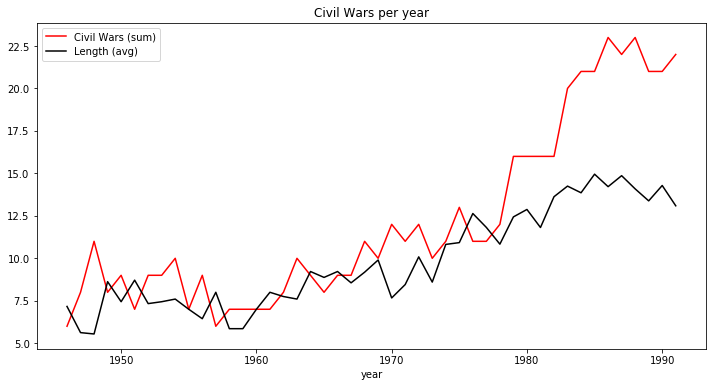

In [4]:
cw_grouped.plot('year', ['DUMMY_CIVIL', 'war_duration'], color=['red', 'black'],
               label=['Civil Wars (sum)', 'Length (avg)'], title='Civil Wars per year', 
               figsize=(12,6))
plt.savefig('./graphs/No_CW_AL.png')

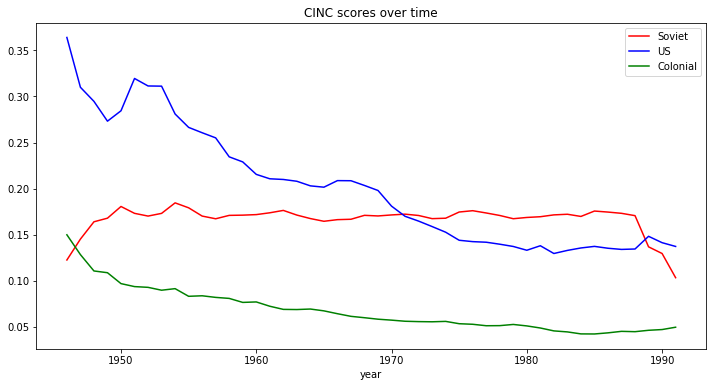

In [21]:
cy_grouped.plot('year', ['SU_cinc', 'US_cinc', 'COL_cinc'], color=['r','b', 'g'],
                title='CINC scores over time', figsize=grote,
               label=['Soviet', 'US', 'Colonial'])
plt.savefig('./graphs/Cinc_scores.png')

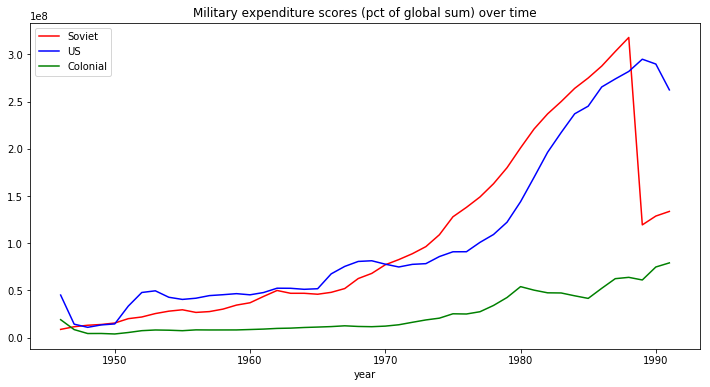

In [18]:
cy_grouped.plot('year', ['SU_milex', 'US_milex', 'COL_milex'], color=['r','b', 'g'],
                title='Military expenditure scores (pct of global sum) over time', figsize=grote,
               label=['Soviet', 'US', 'Colonial'])
plt.savefig('./graphs/Milex_scores.png')

If intervention only or with support 
depends on data used.

### Hypo 1: 
X - More likely to intervene if opponent intervenes

### Hypo 1B: 
X - More likely to intervene is block ally intervenes


### Hypo 2: 
Domnestic politics of Country matter




### Hypo 2: 
- The greater the importance


---------

### Hypo 1:

Pol of countries influences support / intervention

1. Democ gov, more likely to sup
2. Autoc gov, less likely to sup
3. Autoc gov, more likely to oppose
4. SU effects on above
5. Country alignment effects on above (Aka, west leaning autoc vs neutral demo)
5. Indep war? 

____
Soviet Versions of this. 


### Hypo 2:

Colonial influence on SU, US too - but less after start col war

1. SU, intervention / indep war  
2. SU, intervention after Stalin? 
3. SU, intervention, including NON MIL
4. Cuba intervention, More third world
5. SU intervention IF cuba?
------
1. Declining US intervention with years. 
2. Indep wars less important IF SU support?


### Hypo 3, politics of actors

1. US, democ vs republican
2. US, presidents
3. Above, but with country democ control variables?
______
1. SU, leaders
2. SU, leaders indep 
3. SU, leaders, support


### Hypo 4, The more greater the trade importance, the more likely to intervene

1. Voor US
2. Voor SU
3. Voor COMS
4. Voor cols  (Want als straks blijkt dat dat bij laatste 2 niet het geval is, int)



### Hypo 5, Colonial interventions in age of superpowers

1. Indep wars, SU / US effects
2. Indep wars, cuba effect?
3. Involvement in post colonies, SU / US / CUBA/ CHina effects





#### perhaps

1. Years since / before vietnam war
(Vietnam syndrome for US)  <-- Pol factor? 
Yoon 583)

2. Election years | more / less likely
3. Continent test Yoon 596, neglicable
4. Power of nation IF int in support of GOV. WEak gov --> more support



In [7]:
mask = cw_df['US_imi'] == 1
df2 = cw_df[mask]
df2 = df2[['Support government', 'Oppose rebels or opposition groups']]

In [8]:
df2.head()

,Support government,Oppose rebels or opposition groups
313,0.0,0.0
895,0.0,1.0
1802,0.0,1.0
1916,0.0,0.0
1927,0.0,0.0


In [9]:
for col in cw_df.columns:
    print(col)

Unnamed: 0
yearc
year
cowcode
country
onset
war
warname
warno
wartype
yrbeg
yrend
anarc
anarcl
anoc
anocl
area2001
asia
autoc
autocl
democ
democl
eeurop
ethfrac
gdp
gdppc
gdppcl
implag
imppower
instab
instabl
lamerica
lmtnest
lnpop
lnpopl
milperc
milpercl
nafrme
nbcivil
nbconq
nbinter
nbnatind
nbnonind
nsflag
nsfyear
ocivil
oconq
oil
oilpc
oilpcl
ointer
ointrap
onatind
ononind
pdemnb
pocivil
poconq
pointer
pointrap
poldisc
poldiscl
ponatind
pononind
ponset
pop
relfrac
ssafrica
western
start
president
party
Dwight D. Eisenhower
George H. W. Bush
Gerald Ford
Harry S. Truman
Jimmy Carter
John F. Kennedy
Lyndon B. Johnson
Richard Nixon
Ronald Reagan
Democratic
Republican
USP_YIO
SU_leader
SUL_start_year
Andropov
Brezhnev
Chernenko
Gorbachev
Khrushchev
Stalin
SUL_YIO
US_gdppc
US_gdppcl
US_year
SU_gdppc
SU_gdppcl
UK_gdppc
UK_gdppcl
NL_gdppc
NL_gdppcl
BE_gdppc
BE_gdppcl
FR_gdppc
FR_gdppcl
SP_gdppc
SP_gdppcl
PR_gdppc
PR_gdppcl
CUBA_gdppc
CUBA_gdppcl
CH_gdppc
CH_gdppcl
YG_gdppc
YG_gdppcl
US_mil